# 1. Import Library

In [1]:
# Simple CNN model for the CIFAR-10 Dataset
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()

In [3]:
print("train data:",'images:',X_img_train.shape," labels:",y_label_train.shape) 
print("test  data:",'images:',X_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [9]:
#卷積層1與池化層1

In [10]:
model.add(Conv2D(filters=30,kernel_size=(3, 3),input_shape=(32, 32,3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=30, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
#卷積層2與池化層2

In [12]:
model.add(Conv2D(filters=50, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(Dropout(0.1))
model.add(Conv2D(filters=50, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#卷積層3與池化層3

In [14]:
model.add(Conv2D(filters=150, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=150, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [16]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2700, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 30)        840       
                                                                 
 dropout (Dropout)           (None, 32, 32, 30)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 30)        8130      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 30)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 50)        13550     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 50)        0         
                                                        

# 載入之前訓練的模型

In [18]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [20]:
train_history=model.fit(X_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=50, batch_size=150, verbose=1)          

Epoch 1/50
267/267 [==============================] - 99s 368ms/step - loss: 1.7697 - accuracy: 0.3338 - val_loss: 1.5980 - val_accuracy: 0.4156
Epoch 2/50
267/267 [==============================] - 98s 368ms/step - loss: 1.3491 - accuracy: 0.5079 - val_loss: 1.2057 - val_accuracy: 0.5580
Epoch 3/50
267/267 [==============================] - 97s 364ms/step - loss: 1.1343 - accuracy: 0.5941 - val_loss: 1.0438 - val_accuracy: 0.6306
Epoch 4/50
267/267 [==============================] - 96s 360ms/step - loss: 1.0021 - accuracy: 0.6451 - val_loss: 0.9625 - val_accuracy: 0.6639
Epoch 5/50
267/267 [==============================] - 96s 359ms/step - loss: 0.8925 - accuracy: 0.6839 - val_loss: 0.8309 - val_accuracy: 0.7023
Epoch 6/50
267/267 [==============================] - 96s 360ms/step - loss: 0.8041 - accuracy: 0.7165 - val_loss: 0.8215 - val_accuracy: 0.7104
Epoch 7/50
267/267 [==============================] - 98s 366ms/step - loss: 0.7293 - accuracy: 0.7416 - val_loss: 0.8152 - val_ac

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [22]:
show_train_history('acc','val_acc')

KeyError: 'acc'

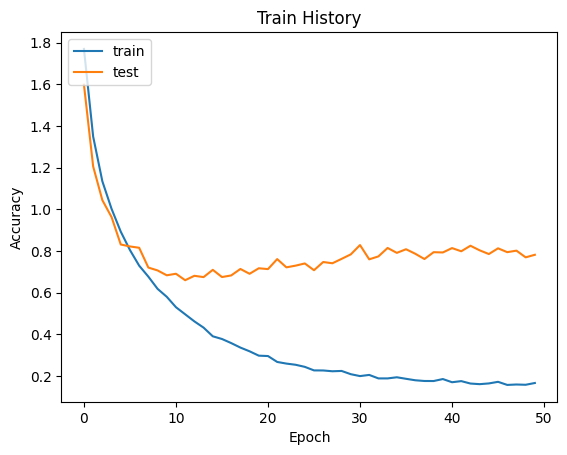

In [23]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [24]:
scores = model.evaluate(X_img_test_normalize, 
                        y_label_test_OneHot,verbose=0)
scores[1]

0.7799999713897705

# 進行預測

In [ ]:
prediction=model.predict_classes(X_img_test_normalize)

In [ ]:
prediction[:10]

In [ ]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [ ]:
plot_images_labels_prediction(X_img_test_normalize,y_label_test,
                              prediction,0,10)

# 查看預測機率

In [ ]:
Predicted_Probability=model.predict(X_img_test_normalize)

In [ ]:
def show_Predicted_Probability(X_img,Predicted_Probability,i):
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(X_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

In [ ]:
show_Predicted_Probability(X_img_test,Predicted_Probability,0)

In [ ]:
show_Predicted_Probability(X_img_test,Predicted_Probability,3)

# Save model to JSON

In [ ]:
model_json = model.to_json()
with open("SaveModel/cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

# Save Model to YAML

In [ ]:
model_yaml = model.to_yaml()
with open("SaveModel/cifarCnnModelnew.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)


# Save Weight to h5 

In [ ]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")